# Wavelet Analysis: Part Two

## Wavelet Terminology

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import pywt

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


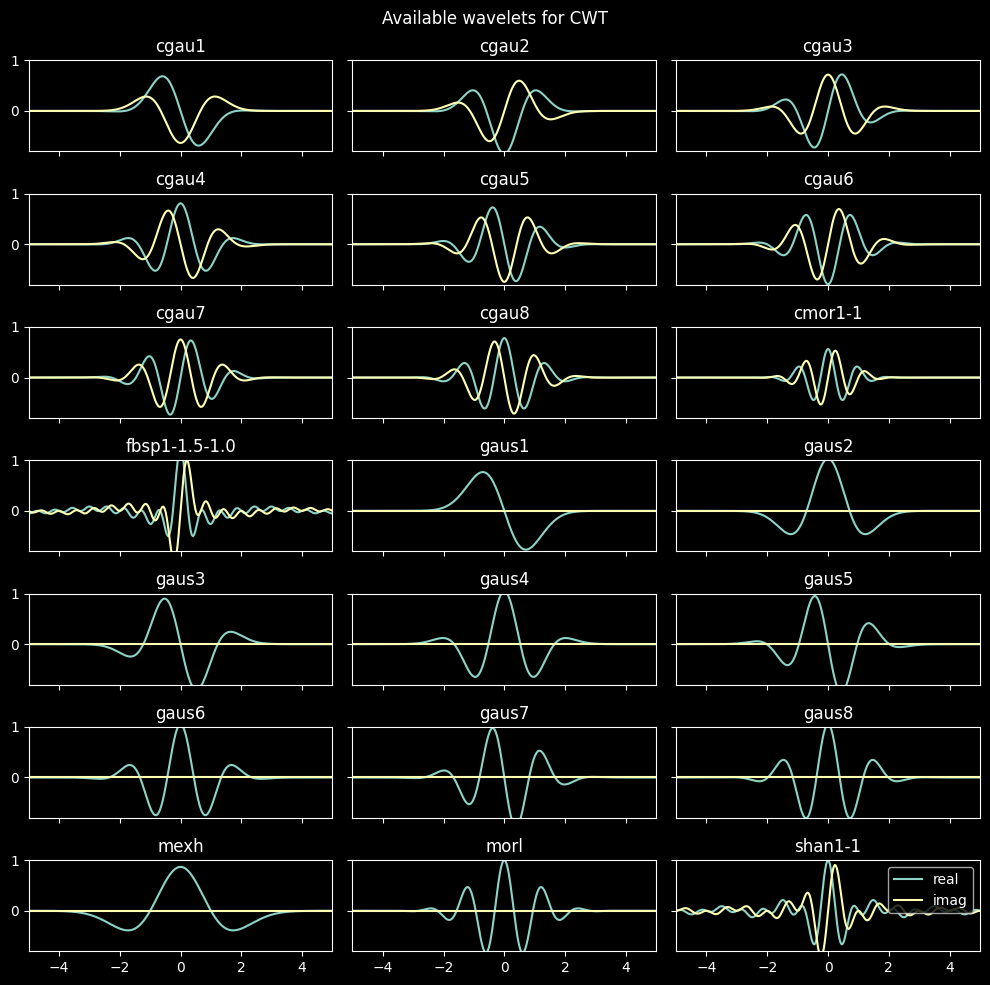

In [153]:
# https://pywavelets.readthedocs.io/en/latest/ref/cwt.html
wavlist = pywt.wavelist(kind="continuous")
print(wavlist)
cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(10, 10),
                        sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name
    if wavelet in ['cmor', 'shan']:
        wavelet += '1-1'
    elif wavelet == 'fbsp':
        wavelet += '1-1.5-1.0'

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])

ax.legend(loc="upper right")
plt.suptitle("Available wavelets for CWT")
plt.tight_layout()
plt.savefig("cwt_examples.png")
plt.show()

In [154]:
sample_rate, signal_data = wavfile.read('jingle_bells.wav')

In [155]:
s0 = 1
jtot = 40
dj = 1
print(np.arange(s0, jtot, dj))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [156]:
wavelet_mother = "morl" # morlet
scales = np.arange(1, 41)
print("| Scale   | Freq (Hz) |")
print("|--------|--------|")
for scale in scales:
    print(f"| {scale} | {pywt.scale2frequency(wavelet_mother, scale)*sample_rate:.2f} |")

| Scale   | Freq (Hz) |
|--------|--------|
| 1 | 8125.00 |
| 2 | 4062.50 |
| 3 | 2708.33 |
| 4 | 2031.25 |
| 5 | 1625.00 |
| 6 | 1354.17 |
| 7 | 1160.71 |
| 8 | 1015.62 |
| 9 | 902.78 |
| 10 | 812.50 |
| 11 | 738.64 |
| 12 | 677.08 |
| 13 | 625.00 |
| 14 | 580.36 |
| 15 | 541.67 |
| 16 | 507.81 |
| 17 | 477.94 |
| 18 | 451.39 |
| 19 | 427.63 |
| 20 | 406.25 |
| 21 | 386.90 |
| 22 | 369.32 |
| 23 | 353.26 |
| 24 | 338.54 |
| 25 | 325.00 |
| 26 | 312.50 |
| 27 | 300.93 |
| 28 | 290.18 |
| 29 | 280.17 |
| 30 | 270.83 |
| 31 | 262.10 |
| 32 | 253.91 |
| 33 | 246.21 |
| 34 | 238.97 |
| 35 | 232.14 |
| 36 | 225.69 |
| 37 | 219.59 |
| 38 | 213.82 |
| 39 | 208.33 |
| 40 | 203.12 |


In [157]:
# note frequency in hz
a_freq = 440
print(f"A note {a_freq} hz")
b_freq = 494
print(f"B note {b_freq} hz")
c_freq = 261
print(f"C note {c_freq} hz")
d_freq = 293
print(f"D note {d_freq} hz")
e_freq = 330
print(f"E note {e_freq} hz")
f_freq = 350
print(f"F note {f_freq} hz")
g_freq = 392
print(f"G note {g_freq} hz")

A note 440 hz
B note 494 hz
C note 261 hz
D note 293 hz
E note 330 hz
F note 350 hz
G note 392 hz


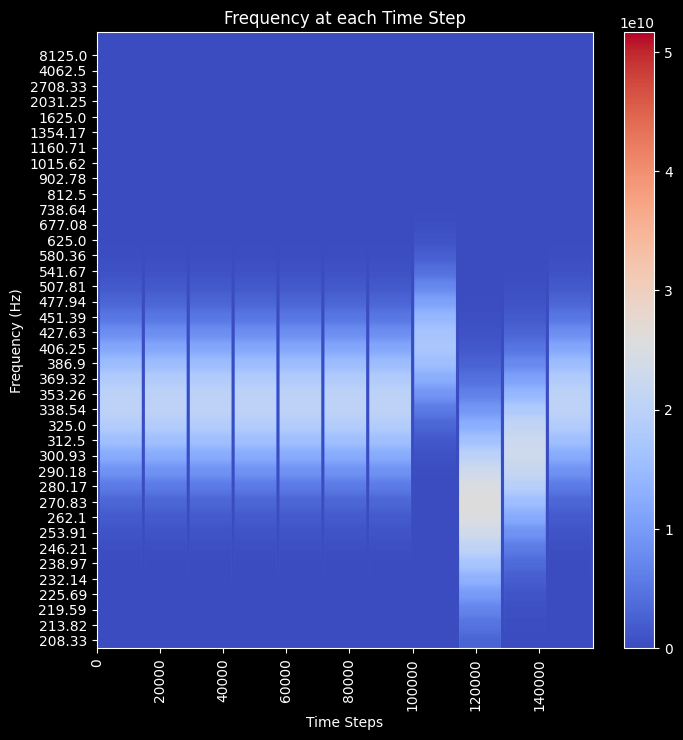

In [158]:
plt.style.use('dark_background')
wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(1, 41)
wavelet_coeffs, freqs = pywt.cwt(signal_data, scales, wavelet = wavelet_mother)

# Convert Scales to Frequency
y_tickrange = [round(pywt.scale2frequency(wavelet_mother, scale)*sample_rate,2) for scale in scales]

# Plot scalogram
# compare the power spectrum (absolute value squared)
power = np.power((abs(wavelet_coeffs)), 2)

fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Frequency at each Time Step")
plt.xlabel("Time Steps")
plt.ylabel("Frequency (Hz)")
plt.xticks(rotation=90)
plt.yticks(scales, y_tickrange)
plt.imshow(power, vmax=(power).max(), vmin=(power).min(), cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.savefig("p2_jingle_bells_wavelet.png")
plt.show()

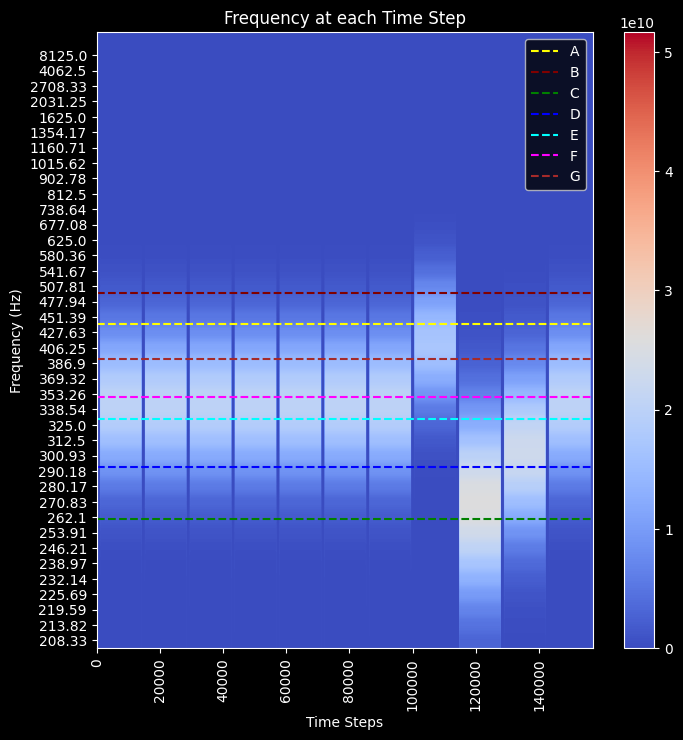

In [159]:
sample_rate, signal_data = wavfile.read('jingle_bells.wav')
rate = 1/sample_rate

# note frequency in hz
fig, ax = plt.subplots(figsize=(8, 8))
a_note = pywt.frequency2scale(wavelet_mother, a_freq*rate)
plt.axhline(y=a_note, color='yellow', linestyle='--', label='A')
b_note = pywt.frequency2scale(wavelet_mother, b_freq*rate)
plt.axhline(y=b_note, color="maroon", linestyle='--', label='B')
c_note = pywt.frequency2scale(wavelet_mother, c_freq*rate)
plt.axhline(y=c_note, color='green', linestyle='--', label='C')
d_note = pywt.frequency2scale(wavelet_mother, d_freq*rate)
plt.axhline(y=d_note, color='blue', linestyle='--', label='D')
e_note = pywt.frequency2scale(wavelet_mother, e_freq*rate)
plt.axhline(y=e_note, color='cyan', linestyle='--', label='E')
f_note = pywt.frequency2scale(wavelet_mother, f_freq*rate)
plt.axhline(y=f_note, color='fuchsia', linestyle='--', label='F')
g_note = pywt.frequency2scale(wavelet_mother, g_freq*rate)
plt.axhline(y=g_note, color='brown', linestyle='--', label='G')

wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(1, 41)
wavelet_coeffs, freqs = pywt.cwt(signal_data, scales, wavelet = wavelet_mother)

# Convert Scales to Frequency
y_tickrange = [round(pywt.scale2frequency(wavelet_mother, scale)*sample_rate,2) for scale in scales]

# Plot scalogram
# compare the power spectrum (absolute value squared)
power = np.power((abs(wavelet_coeffs)), 2)

plt.title("Frequency at each Time Step")
plt.xlabel("Time Steps")
plt.ylabel("Frequency (Hz)")
plt.xticks(rotation=90)
plt.yticks(scales, y_tickrange)
plt.imshow(power, vmax=(power).max(), vmin=(power).min(), cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.legend()
plt.savefig("p2_jingle_bells_wavelet_freq1.png")
plt.show()

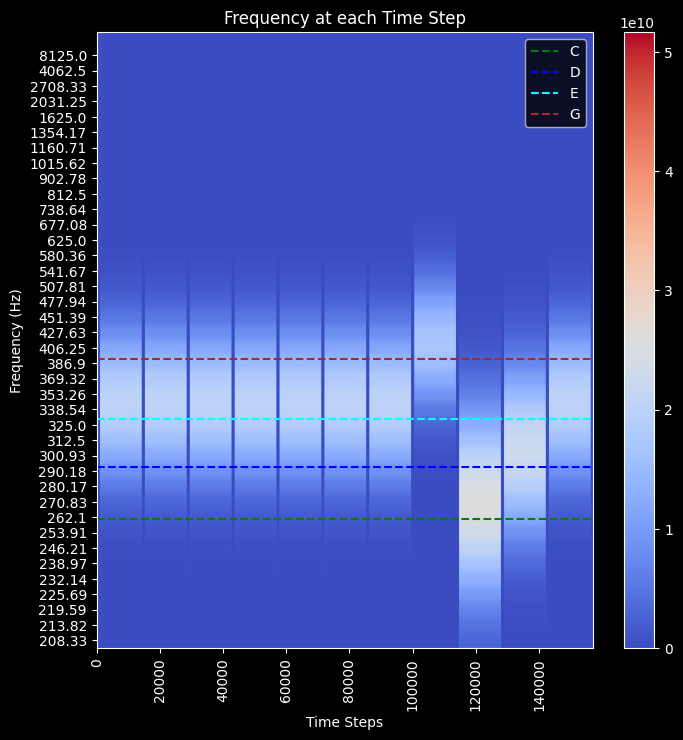

In [160]:
sample_rate, signal_data = wavfile.read('jingle_bells.wav')
rate = 1/sample_rate

# note frequency in hz
fig, ax = plt.subplots(figsize=(8, 8))
c_note = pywt.frequency2scale(wavelet_mother, c_freq*rate)
plt.axhline(y=c_note, color='green', linestyle='--', label='C')
d_note = pywt.frequency2scale(wavelet_mother, d_freq*rate)
plt.axhline(y=d_note, color='blue', linestyle='--', label='D')
e_note = pywt.frequency2scale(wavelet_mother, e_freq*rate)
plt.axhline(y=e_note, color='cyan', linestyle='--', label='E')
f_note = pywt.frequency2scale(wavelet_mother, f_freq*rate)
plt.axhline(y=g_note, color='brown', linestyle='--', label='G')

# Convert Scales to Frequency
y_tickrange = [round(pywt.scale2frequency(wavelet_mother, scale)*sample_rate,2) for scale in scales]

# Plot scalogram
# compare the power spectrum (absolute value squared)
power = np.power((abs(wavelet_coeffs)), 2)

plt.title("Frequency at each Time Step")
plt.xlabel("Time Steps")
plt.ylabel("Frequency (Hz)")
plt.xticks(rotation=90)
plt.yticks(scales, y_tickrange)
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.legend()
plt.savefig("p2_jingle_bells_wavelet_freq2.png")
plt.show()

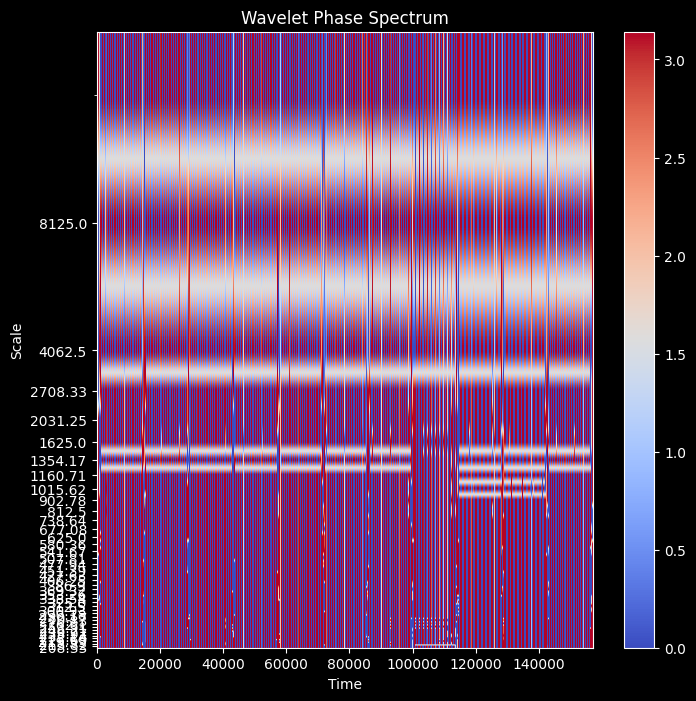

In [161]:
# Plot scalogram
fig, ax = plt.subplots(figsize=(8, 8))

# compare the phase spectrum
phase = np.angle(wavelet_coeffs)

# Convert Scales to Frequency
y_tickrange = [round(pywt.scale2frequency(wavelet_mother, scale)*sample_rate,2) for scale in scales]

ax.set_yscale("symlog")
ax.invert_yaxis()
plt.yticks(scales, y_tickrange)
plt.title("Wavelet Phase Spectrum")
plt.xlabel("Time")
plt.ylabel("Scale")
plt.imshow(
    phase, vmax=(phase).max(), vmin=(phase).min(), cmap="coolwarm", aspect="auto"
)
plt.colorbar()
plt.show()